<a href="https://colab.research.google.com/github/sarapinedap-tech/Parcial-1/blob/master/parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dataframe y bibliotecas**

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = {
 'Producto': ['A', 'B', 'C', 'D', 'E', 'F'],
 'Ventas': [120, 340, 290, 410, 150, 380],
 'Costo': [80, 200, 180, 260, 90, 240],
 'Categoria': ['Tecnología', 'Hogar', 'Tecnología', 'Hogar', 'Oficina', 'Tecnología'],
 'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero', 'Marzo', 'Marzo']
}
df = pd.DataFrame(data)

In [22]:
df

,Producto,Ventas,Costo,Categoria,Mes,Ganancia
0,A,120,80,Tecnología,Enero,40
1,B,340,200,Hogar,Enero,140
2,C,290,180,Tecnología,Febrero,110
3,D,410,260,Hogar,Febrero,150
4,E,150,90,Oficina,Marzo,60
5,F,380,240,Tecnología,Marzo,140


### **Punto 1**

In [19]:
ventas = np.array(df['Ventas'])
# La funcion array convierte el df en un arreglo de numpy para poder aplicar funciones de esta libreria al df y el df["ventas"] extrae la columna Ventas del DataFrame.

promedio_ventas = np.mean(ventas)
print("El promedio de las ventas es:", promedio_ventas)
# Aqui por medio de la funcion promedio se calcula sumando todos los valores y dividiendolo por el total de valores

max_ventas = np.max(ventas)
min_ventas = np.min(ventas)
# Con las funciones min y max se llama el valor maximo y minimo y luego con print se muestran estos datos
print("El valor máximo de ventas es:", max_ventas)
print("El valor mínimo de ventas es:", min_ventas)

El promedio de las ventas es: 281.6666666666667
El valor máximo de ventas es: 410
El valor mínimo de ventas es: 120


### **Punto 2**

In [8]:
ventas = np.array(df['Ventas'])
ventasmayores300 = np.where(ventas > 300, 1, 0)
print(ventasmayores300)

[0 1 0 1 0 1]


### **Punto 3**

In [9]:
df["Ganancia"] = df["Ventas"]-df["Costo"] # se crea una nueva columna con pandas
df.head() # muestra las primeras 5 filas del dataframe

,Producto,Ventas,Costo,Categoria,Mes,Ganancia
0,A,120,80,Tecnología,Enero,40
1,B,340,200,Hogar,Enero,140
2,C,290,180,Tecnología,Febrero,110
3,D,410,260,Hogar,Febrero,150
4,E,150,90,Oficina,Marzo,60


In [17]:
ganancia100 = df[df['Ganancia'] > 100]
ganancia100[['Producto', 'Ganancia']]

,Producto,Ganancia
1,B,140
2,C,110
3,D,150
5,F,140


### **Punto 4**

In [15]:
tecnologia300 = df[(df['Categoria'] == 'Tecnología') & (df['Ventas'] > 300)]
tecnologia300[['Producto', 'Ventas', 'Ganancia']]

,Producto,Ventas,Ganancia
5,F,380,140


### **Punto 5**

In [29]:
mes = df.groupby('Mes').agg(ventas_tot=('Ventas', 'sum'), ganancia_prom=('Ganancia', 'mean'))
print(mes)
# La función "sum()" calcula la suma de todos los valores del conjunto de datos, y "mean()" calcula el promedio al dividir la suma de los valores entre la cantidad total de datos. En este caso se usó sum0 para obtener las ventas totales por mes y mean() para calcular la ganancia promedio mensual.

         ventas_tot  ganancia_prom
Mes                               
Enero           460           90.0
Febrero         700          130.0
Marzo           530          100.0


### **Punto 6**

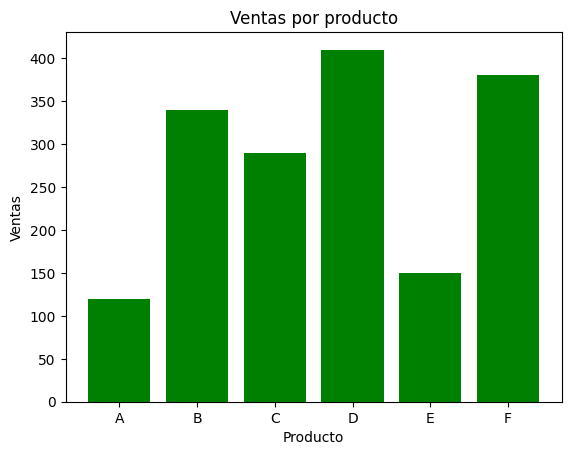

In [41]:
plt.bar(df['Producto'], df['Ventas'], color='green')

plt.title('Ventas por producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()



### **Punto 7**

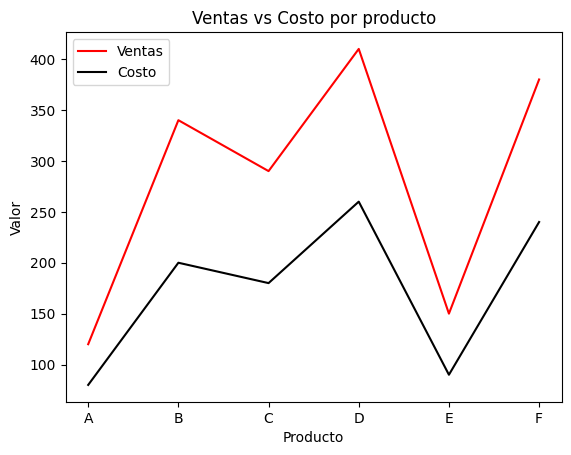

In [48]:
plt.plot(df['Producto'], df['Ventas'],label='Ventas', color='red')
plt.plot(df['Producto'], df['Costo'],label='Costo',color='black')

plt.title('Ventas vs Costo por producto')
plt.xlabel('Producto')
plt.ylabel('Valor')

plt.legend()
plt.show()

# Se observa que el valor de las ventas es mayor por producto en comparacion al costo por cada prodcuto, ya que las ventas por prodcuto son mayores al costo por producto se puede decir que si es rentablela venta de los productos

### **Punto 8**

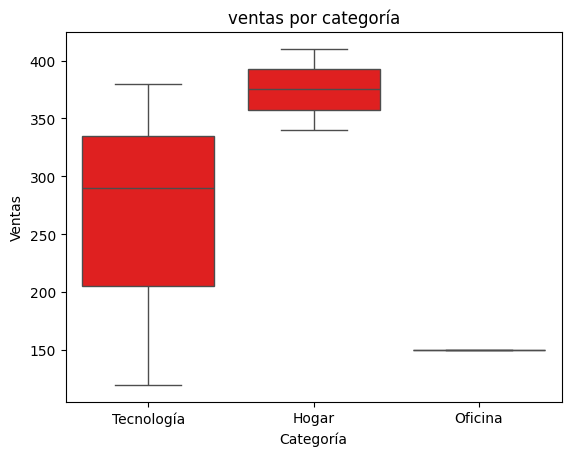

In [51]:
sns.boxplot(x='Categoria', y='Ventas', data=df, color='red')

plt.title('ventas por categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')

plt.show()

# La categoria con mayior desviacion entre sus datos es la de tecnologia como se puede ver en el diagrama

### **Punto 9**

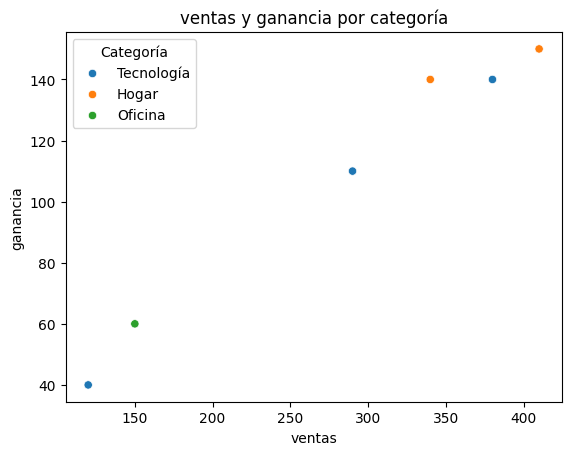

In [60]:
sns.scatterplot(data=df,x='Ventas',y='Ganancia',hue='Categoria')

plt.title('ventas y ganancia por categoría')
plt.xlabel('ventas')
plt.ylabel('ganancia')

plt.legend(title='Categoría')
plt.show()


### **Punto 10**

**Producto mas rentable**

In [54]:
ganancia100[['Producto', 'Ganancia']]
# El producto con mayor ganancia es el D, por lo que este es el más rentable

,Producto,Ganancia
1,B,140
2,C,110
3,D,150
5,F,140


**categoría con mayor ganancia total**

In [55]:
df.groupby('Categoria')['Ganancia'].sum()
# Las categorias con mayor ganancia total son hogar y tecnología

,Ganancia
Categoria,
Hogar,290
Oficina,60
Tecnología,290


**¿Qué decisión comercial tomaría a partir de los datos?**

Invertir más en la categoría de tecnología ya que tiene productos con mayor ganancia como el Producto D, esto debido a que los análisis muestran que tecnología es la categoría que genera mayor ganancia total y que el producto D es el más rentable. Los gráficos muestran que cuando las ventas aumentan la ganancia también aumenta, por lo que enfocarse en estos productos puede maximizar los ingresos
